In [1]:
%matplotlib inline

# Plotting Decision Regions

A function for plotting decision regions of classifiers in 1 or 2 dimensions.

> from mlxtend.plotting import plot_decision_regions

### References

- 

## Example 1 - Decision regions in 2D

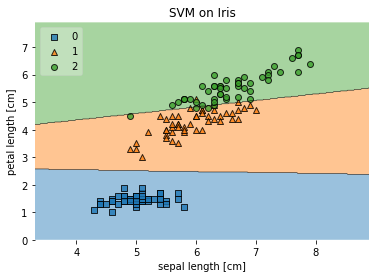

In [2]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

## Example 2 - Decision regions in 1D

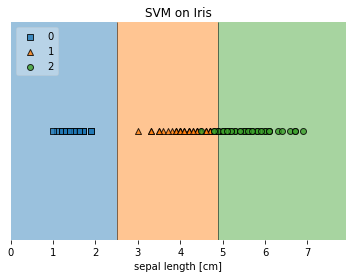

In [3]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, 2]
X = X[:, None]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.title('SVM on Iris')

plt.show()

## Example 3 - Decision Region Grids

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = SVC()

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target

/Users/sebastian/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sebastian/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sebastian/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sebastian/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "

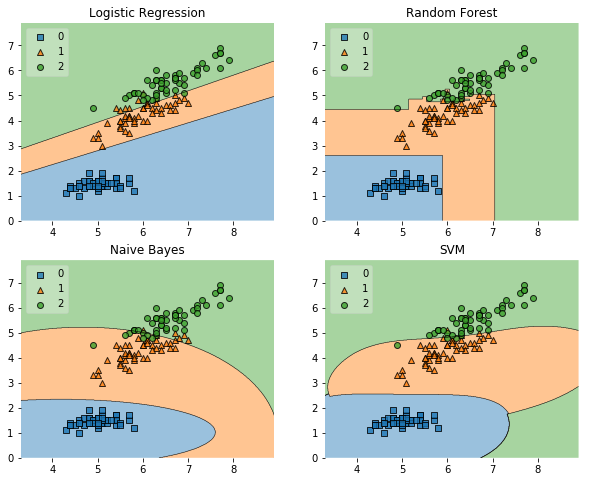

In [5]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

## Example 4 - Highlighting Test Data Points

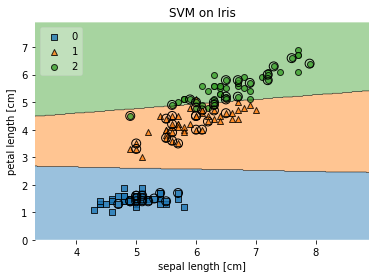

In [6]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC


# Loading some example data
iris = datasets.load_iris()
X, y = iris.data[:, [0,2]], iris.target
X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=3)

X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2, 
                      X_highlight=X_test)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

## Example 5 - Evaluating Classifier Behavior on Non-Linear Problems

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=100, 
                              random_state=1)
clf3 = GaussianNB()
clf4 = SVC()

In [8]:
# Loading Plotting Utilities
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
import numpy as np

### XOR

In [9]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

/Users/sebastian/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sebastian/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


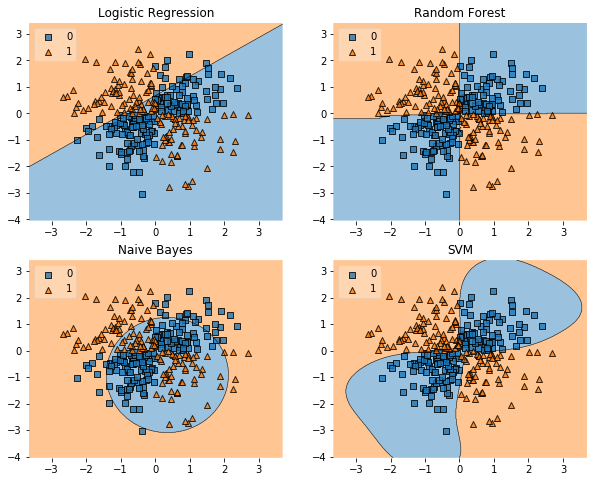

In [10]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

### Half-Moons

/Users/sebastian/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sebastian/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


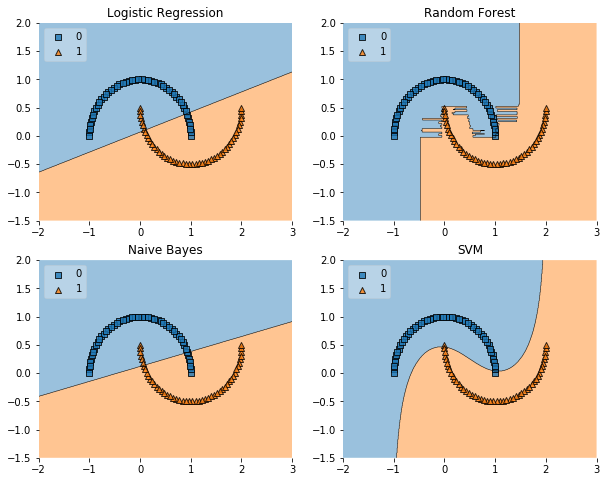

In [11]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

### Concentric Circles

/Users/sebastian/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sebastian/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


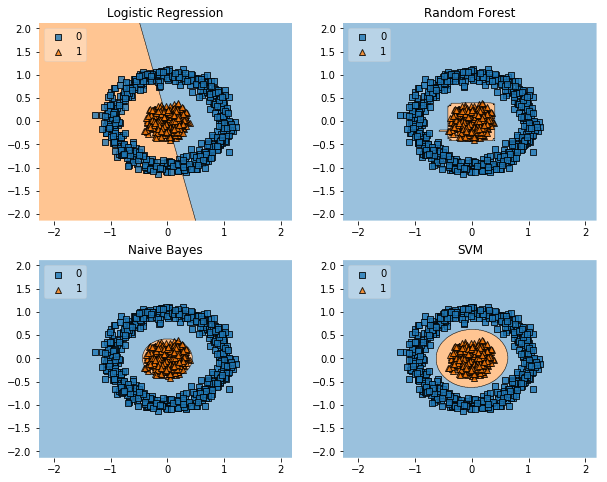

In [12]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

## Example 6 - Working with existing axes objects using subplots

/Users/sebastian/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sebastian/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


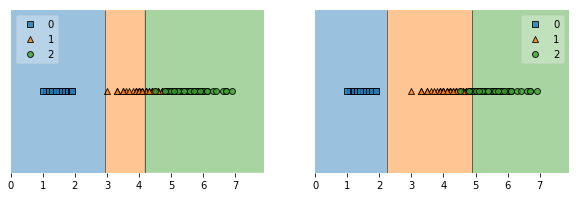

In [13]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import datasets
import numpy as np

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, 2]
X = X[:, None]
y = iris.target

# Initializing and fitting classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = GaussianNB()
clf1.fit(X, y)
clf2.fit(X, y)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

fig = plot_decision_regions(X=X, y=y, clf=clf1, ax=axes[0], legend=2)
fig = plot_decision_regions(X=X, y=y, clf=clf2, ax=axes[1], legend=1)
    
plt.show()

## Example 7 - Decision regions with more than two training features

/Users/sebastian/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


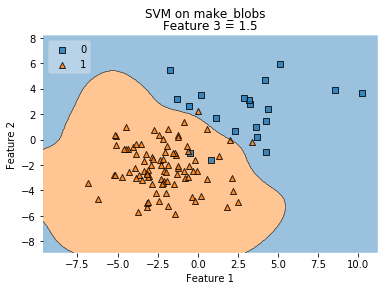

In [14]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
X, y = datasets.make_blobs(n_samples=600, n_features=3,
                           centers=[[2, 2, -2],[-2, -2, 2]],
                           cluster_std=[2, 2], random_state=2)

# Training a classifier
svm = SVC()
svm.fit(X, y)

# Plotting decision regions
fig, ax = plt.subplots()
# Decision region for feature 3 = 1.5
value = 1.5
# Plot training sample with feature 3 = 1.5 +/- 0.75
width = 0.75
plot_decision_regions(X, y, clf=svm,
                      filler_feature_values={2: value},
                      filler_feature_ranges={2: width},
                      legend=2, ax=ax)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Feature 3 = {}'.format(value))

# Adding axes annotations
fig.suptitle('SVM on make_blobs')
plt.show()

## Example 8 - Grid of decision region slices

/Users/sebastian/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


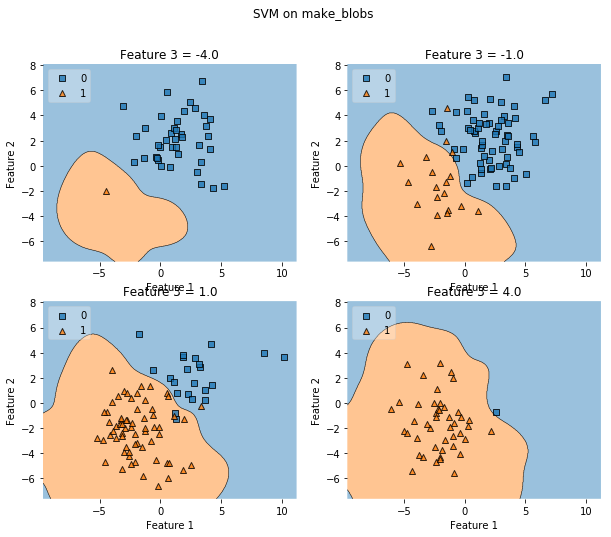

In [15]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
X, y = datasets.make_blobs(n_samples=500, n_features=3, centers=[[2, 2, -2],[-2, -2, 2]],
                           cluster_std=[2, 2], random_state=2)

# Training a classifier
svm = SVC()
svm.fit(X, y)

# Plotting decision regions
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
values = [-4.0, -1.0, 1.0, 4.0]
width = 0.75
for value, ax in zip(values, axarr.flat):
    plot_decision_regions(X, y, clf=svm,
                          filler_feature_values={2: value},
                          filler_feature_ranges={2: width},
                          legend=2, ax=ax)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Feature 3 = {}'.format(value))

# Adding axes annotations
fig.suptitle('SVM on make_blobs')
plt.show()

## Example 9 - Customizing the plotting style

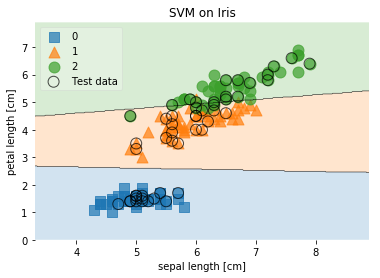

In [16]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=3)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

# Specify keyword arguments to be passed to underlying plotting functions
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}
# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2,
                      X_highlight=X_test,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

## Example 10 - Providing your own legend labels

Custom legend labels can be provided by returning the `axis` object(s) from the `plot_decision_region` function and then getting the handles and labels of the legend. Custom handles (i.e., labels) can then be provided via `ax.legend`


```python
ax = plot_decision_regions(X, y, clf=svm, legend=0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['class 0', 'class 1', 'class 2'], 
           framealpha=0.3, scatterpoints=1)

```

An example is shown below.

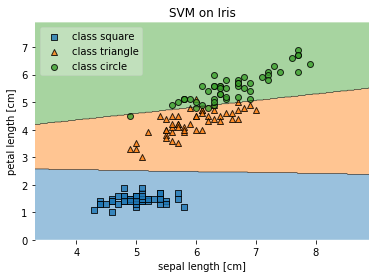

In [17]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)


# Plotting decision regions
ax = plot_decision_regions(X, y, clf=svm, legend=0)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['class square', 'class triangle', 'class circle'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

# API

In [18]:
with open('../../api_modules/mlxtend.plotting/plot_decision_regions.md', 'r') as f:
    print(f.read())

## plot_decision_regions

*plot_decision_regions(X, y, clf, feature_index=None, filler_feature_values=None, filler_feature_ranges=None, ax=None, X_highlight=None, res=None, legend=1, hide_spines=True, markers='s^oxv<>', colors='#1f77b4,#ff7f0e,#3ca02c,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf', scatter_kwargs=None, contourf_kwargs=None, scatter_highlight_kwargs=None)*

Plot decision regions of a classifier.

Please note that this functions assumes that class labels are
labeled consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class
labels with integer labels > 4, you may want to provide additional colors
and/or markers as `colors` and `markers` arguments.
See http://matplotlib.org/examples/color/named_colors.html for more
information.

**Parameters**

- `X` : array-like, shape = [n_samples, n_features]

    Feature Matrix.

- `y` : array-like, shape = [n_samples]

    True class labels.

- `clf` : Classifier object.

    Must have a .predict method.

- `feature_index